# Motivating Example Ablation Studies

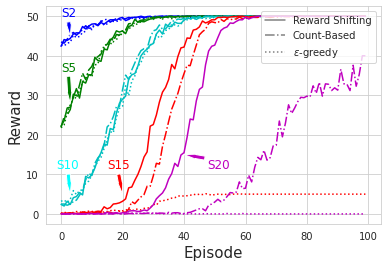

In [1]:
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
color_list = ['b', 'g', 'c', 'r', 'm']
for j,GRID_SIZE in enumerate([2, 5, 10, 15, 20]):
    plt.plot(np.load(f'grid_return_{GRID_SIZE}.npy')[0].mean(0),linestyle=':', color = color_list[j])
    plt.plot(np.load(f'grid_return_{GRID_SIZE}.npy')[1].mean(0),linestyle='-.', color = color_list[j])
    plt.plot(np.load(f'grid_return_{GRID_SIZE}.npy')[6].mean(0), color = color_list[j])

# plt.legend(loc='lower left')

line = Line2D([0,1],[0,1],linestyle='-', color='gray')
line2 = Line2D([0,1],[0,1],linestyle='-.', color='gray')
line3 = Line2D([0,1],[0,1],linestyle=':', color='gray')
plt.legend([line, line2, line3],['Reward Shifting', 'Count-Based','$\epsilon$-greedy'], loc='upper right',fontsize=10)
# plt.legend(loc='lower right')
plt.annotate('S2', xy=(3, 45),  xycoords='data',
            xytext=(0.09, 1.00), textcoords='axes fraction', color = 'blue',
            arrowprops=dict(facecolor='blue', shrink=0.001,headwidth=5),
            horizontalalignment='right', verticalalignment='top',
            fontsize=12
            )
plt.annotate('S5', xy=(3, 28),  xycoords='data',
            xytext=(0.09, 0.75), textcoords='axes fraction', color = 'green',
            arrowprops=dict(facecolor='green', shrink=0.001,headwidth=5),
            horizontalalignment='right', verticalalignment='top',
            fontsize=12
            )
plt.annotate('S10', xy=(3, 5),  xycoords='data',
            xytext=(0.1, 0.3), textcoords='axes fraction', color = 'cyan',
            arrowprops=dict(facecolor='cyan', shrink=0.001,headwidth=5),
            horizontalalignment='right', verticalalignment='top',
            fontsize=12
            )
plt.annotate('S15', xy=(20, 5),  xycoords='data',
            xytext=(0.25, 0.3), textcoords='axes fraction', color = 'red',
            arrowprops=dict(facecolor='red', shrink=0.001,headwidth=5),
            horizontalalignment='right', verticalalignment='top',
            fontsize=12
            )
plt.annotate('S20', xy=(40, 15),  xycoords='data',
            xytext=(0.55, 0.3), textcoords='axes fraction', color = 'm',
            arrowprops=dict(facecolor='m', shrink=0.001,headwidth=5),
            horizontalalignment='right', verticalalignment='top',
            fontsize=12
            )
plt.xlabel('Episode', fontsize=15)
plt.ylabel('Reward', fontsize=15)
plt.savefig('motivating_ablation.png',dpi=200)
plt.show()

# Experiment on Humanoid --- Exploration

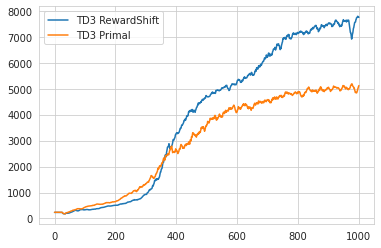

In [5]:
import matplotlib.pyplot as plt

def MA(a, n=20) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    for i in range(n):
        ret[i] = ret[i] * n / (i+1)
    return ret / n
import numpy as np
from IPython import display
from pylab import *
from numpy import *
import matplotlib.pyplot as plt

import sys
from seaborn import lineplot
import seaborn as sns
from pandas import DataFrame
def convert2seaborn(Lst,l):
    HID5_HER_df = DataFrame(Lst)
    test_num = []
    test_acc = []
    for i in range(np.shape(Lst)[1]):
        for j in range(np.shape(Lst)[0]):
            test_num.append(i*l)
            test_acc.append(HID5_HER_df[i][j])
    aa = DataFrame(np.stack((test_num,test_acc),1))
    aa.columns = ['Interactions','Reward']
    return aa


def movavg(array,M=5):
    MA_list = np.zeros_like(array)
    for i in range(len(array)):
        if i == 0:
            MA_list[i] = array[0]
        elif i<M:
            MA_list[i] = np.mean(array[:i])
        else:
            MA_list[i] = MA_list[i-1] - (array[i-M]-array[i])/M
    return MA_list
def MOVAVG(an_list,avg_len = 50):
    a = np.zeros_like(an_list)
    for i in range(np.asarray(an_list).shape[0]):
        a[i] = MA(np.asarray(an_list)[i],avg_len)
    return a


Human_td3_ET_NoBonus = []
for i in range(5):
    Human_td3_ET_NoBonus.append(np.load('../../../ETMDP/TD3_Dec/results/evaluations_aliasTD3_Baseline_ET_NoBonus_ENVHumanoid-v2_Repeat{}.npy'.format(i)))

Human_Context_ET = []
Human_TD3_ET = []
for i in range(5):
    if i in [0,1,2]:
        Human_TD3_ET.append(np.load('../../../___ZOSPI_NonPara/ZOSPI_1M_TS/GP_Mujoco/Reboot20200914/results/evaluations_aliasTD3_Baseline_cp{}_ENVHumanoid-v2_Repeat0.npy'.format(i+1))[:])
    else:
        Human_TD3_ET.append(np.load('../../../___ZOSPI_NonPara/ZOSPI_1M_TS/GP_Mujoco/Reboot20200914/results/evaluations_aliasTD3_Baseline_ENVHumanoid-v2_Repeat{}.npy'.format(i-3))[:])
plt.plot(MA(np.asarray(Human_td3_ET_NoBonus).mean(0),10), label = 'TD3 RewardShift')
plt.plot(MA(np.asarray(Human_TD3_ET).mean(0),10), label = 'TD3 Primal')
plt.legend()
plt.savefig('Humanoid.pdf',dpi=200,format='pdf',bbox_inches = 'tight')